# Fall 2021
# Homework #5
# Sampling Distributions
## Vazgen Tadevosyan

### 1. Random samples of size 𝑛 were taken from populations given below. Given your knowledge of the underlying distributions, determine the means and standard deviations of the sampling distributions

a. Sample is from an unknown distribution with $$ 𝑛 = 36, 𝜇 = 10, 𝜎^2= 9 , statistic\ is\ \overline X  $$

In [239]:
from scipy.stats import norm
import numpy as np
import random
from scipy.stats import binom
import pandas as pd

In [151]:
np.mean(list(map(np.mean,sample)))


12.50953

In [152]:
#generates 10000 samples with sample size 34
sample = np.random.normal(loc=10, scale=3, size=(10000,36))
mean_of_means =np.mean(list(map(np.mean,sample)))
stds_means = np.std(list(map(np.mean,sample)))
print (round(mean_of_means,2),round(stds_means,3))

10.0 0.5


b. Sample is from an unknown distribution with $$ 𝑛 = 8, 𝜇 = 120, 𝜎^2= 4 , statistic\ is\ \overline X  $$

In [175]:
#generates 10000 samples with sample size 8
sample = np.random.normal(loc=120, scale=2, size=(10000,8))
mean_of_means =np.mean(list(map(np.mean,sample)))
stds_means = np.std(list(map(np.mean,sample)))
print (round(mean_of_means,2),round(stds_means,3))

120.0 0.72


b. Sample is from an unknown distribution with $$ 𝑛 = 25, \pi=0.5, statistic\ is\ \hat{p}  $$

In [168]:
# it is like a  result of flipping a coin 25 times, tested 1000 times.
# as much we increase test or sample size as closer they get to population mean and std
samples = np.random.binomial(n=25, p=0.5,size=(100000,25))
mean_of_means =np.mean(list(map(np.mean,samples)))
stds_means = np.std(list(map(np.mean,samples)))
print(round(mean_of_means,3),round(stds_means,3))
#I got wrong answer for std,it is probably sample size 25 is not representative,
#I will calculate by hand as well.

12.5 0.5


In [176]:
print(np.sqrt((0.5**2)/25))

0.1


d. Sample is from a Poisson distribution with 𝜆 = 4, 𝑛 = 16, statistic is 𝑋 ̅
(we didn’t
explicitly talk about this case, but use what we know about sampling distributions of
averages to solve for the Poisson distribution).

In [177]:
samples = np.random.poisson(lam=4, size=(100000,16))
mean_of_means = np.mean(list(map(np.mean,samples)))
stds_means = np.std(list(map(np.mean,samples)))
print(round(mean_of_means,3),round(stds_means,3))

4.0 0.5


### 2. Suppose a random sample of size 25 observations is selected from a population that is normally distributed with mean 106 and standard deviation equal to 12.

a. Give the mean and standard deviation of the sampling distribution of the sample mean

In [184]:
sample = np.random.normal(loc=106, scale=12, size=(10000,25))
mean_of_means = np.mean(list(map(np.mean,samples)))
stds_means = np.std(list(map(np.mean,samples)))
print (round(sample_mean,3), round(stds_means,3))

105.87 0.5


In [197]:
#again I got wrong answer for std, I'll solve by hand
std_of_means = 12/5
std_of_means

2.4

b. Find the probability that x-bar exceeds 110.

In [198]:
round(1-norm(loc = 106, scale = std_of_means).cdf(110),3)

0.048

c. Find the probability that the sample mean deviates from the population mean by no more than 4.


In [200]:
prob = norm(loc = 106, scale = std_of_means).cdf(110)-norm(loc = 106, scale = std_of_means).cdf(101)
print(round(prob,3))

0.934


d. Find the probability that x-bar is less than 100.

In [202]:
round(norm(loc = 106, scale = std_of_means).cdf(100),3)

0.006

3.An advertiser claims that the average percentage of brown M&Ms candies in a package of milk chocolate M&Ms is 13%. Suppose you randomly select a package that contains 55 pieces and determine the proportion of brown candies in the package.

a. What is the approximate distribution of the sample proportion of brown candies in a package that contains 55 candies?

In [220]:
pi = 0.13
n = 55
mu = n*pi
std = np.sqrt(mu*(1-pi))
#it can't be considered normal distribution as n*p<10 however.

np.random.normal(loc=mu,scale=std,size=53)

array([ 6.122622  ,  8.60016262,  5.34689161,  8.42859762,  7.34222057,
        8.74524494,  8.50897896,  9.64052701, 11.2911499 ,  4.35124479,
        9.05900275,  6.64317646,  4.81600497,  3.72064501,  5.18621665,
        7.3119697 , 10.12920187,  5.75203884, 10.37509404,  6.21942826,
        8.49444242,  7.31166893,  4.35038107,  6.03485678,  5.1678154 ,
        9.05208648,  5.89595062,  6.01205063,  6.46099201, 11.0603768 ,
        7.69407152,  9.59489515, 11.31841762,  9.31451667,  6.56137385,
        8.4816972 , 11.29388155,  8.265428  ,  7.85069969,  7.45983483,
        6.91114714,  7.44301891,  9.29408091,  6.57031053,  8.36882538,
       11.70688804,  9.76463906,  5.2815325 ,  9.73176597,  4.68704656,
        7.99114608,  8.28454064,  4.67765127])

b. What is the probability that the sample percentage of brown candies is less than 20%?

In [232]:
the_number = binom(55, 0.13).ppf(0.20)
round(norm(loc = mu, scale = std).cdf(the_number),3)

0.194

c. What is the probability that the sample percentage exceeds 35%?


In [235]:
number =  binom(55, 0.13).ppf(0.35)
round(1-round(norm(loc = mu, scale = std).cdf(number),3))

1

d. What value would you expect the sample proportion to be greater than 95% of the time?

In [237]:
binom(55, 0.13).ppf(0.95)
#more than 11 brown candies in 55

11.0

## 4Use the viscosity data from HW#1

a. Determine if the data can be considered normal. Justify your answer with a normal probability plot.

In [240]:
viscosity = pd.read_csv('viscosity.txt', delimiter = "\t",index_col=0)
viscosity.head()

,Viscosity
Batch,
1,84.63
2,86.84
3,84.54
4,85.56
5,85.40


In [242]:
from scipy.stats import probplot
import pylab 
import scipy.stats as stats

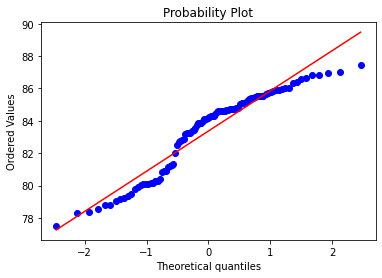

In [243]:
measurements = viscosity['Viscosity']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

#### it seems that data is not normally distributed, however let's conduct shapiro test.

In [246]:
from scipy import stats
shapiro_test = stats.shapiro(measurements)
shapiro_test.pvalue

2.0043020413140766e-05

### we reject null hypothesis as the p-value is less than 0.05,
### data does not come from normal distribution

b. Based on your answer to part a. and assuming the process mean is typically 85 with a standard deviation of 2. What’s the probability of a sample mean less than 83.36?

In [254]:
# 
round(norm(loc = 85, scale = 2/np.sqrt(len(measurements))).cdf(83.36),3)

0.0

c. What do you think about this sample?

Data is not representative, perhaps we need more measurements for viscosity to have more precise point estimators. As sample mean is significantly different from population mean.